In [1]:
# Data Preparation & Data Visualizatio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Building Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
## Evaluating Models
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score

##### EDA

In [26]:
data = pd.read_csv('E:/python/Kaggle/Data/Spam_Ham_data.csv')
data.head()

,email,label,Subject,content
0,b'From exmh-workers-admin@redhat.com Thu Aug ...,0.0,new sequenc window,date wed number aug number number number chri ...
1,b'Return-Path: <Online#3.19578.34-UgGTgZFN19NA...,0.0,cnet newscom cabl compani crack wifi,htmlhead titlec compani crack nametopa logo ad...
2,b'Return-Path: <Online#3.19584.83-p1SYlJ1blFvQ...,0.0,save extra number ipaq number pda cnet shopper,htmlhead newslett hreftopa header tabl widthnu...
3,b'From Steve_Burt@cursor-system.com Thu Aug 2...,0.0,zzzzteana alexand,martin greek sculptor behind plan judg limesto...
4,b'Return-Path: <Online#3.19586.b5-9w0blztbvHPd...,0.0,week deck texedit plu boom,cnet download dispatchmac editionjuli number n...


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   email    3063 non-null   object 
 1   label    3063 non-null   float64
 2   Subject  3008 non-null   object 
 3   content  3059 non-null   object 
dtypes: float64(1), object(3)
memory usage: 95.8+ KB


In [28]:
data.dtypes

email       object
label      float64
Subject     object
content     object
dtype: object

In [29]:
data.describe()

,label
count,3063.000000
mean,0.131897
std,0.338434
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [30]:
data.isnull().sum()

email       0
label       0
Subject    55
content     4
dtype: int64

In [31]:
data.duplicated().sum()

20

In [32]:
data.dropna(axis=0, inplace=True)

In [33]:
data.isnull().sum()

email      0
label      0
Subject    0
content    0
dtype: int64

In [34]:
data.shape

(3004, 4)

In [35]:
data.columns

Index(['email', 'label', 'Subject', 'content'], dtype='object')

In [36]:
data.label.value_counts()

0.0    2604
1.0     400
Name: label, dtype: int64

<Figure size 2000x2000 with 0 Axes>

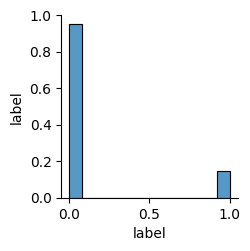

In [37]:
plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

#### Modeling
1. Use bagging method CountVectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

X = data.content
y = data.label.astype(int)
vector = CountVectorizer()
X = vector.fit_transform(X)
X.toarray().shape

(3004, 40546)

2. Split the data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

In [51]:
print(X_train.shape[0],X_test.shape[0])

2403 601


3. Models

- Decision Tree

In [52]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 25)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=25)

In [54]:
dt.score(X_train, y_train)

0.9975031210986267

In [56]:
dt.score(X_test, y_test)

0.9550748752079867

In [63]:
y_pred = dt.predict(X_test)
acc = accuracy_score(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_scores = dict()
f1_scores['DecisionTree'] = f1
print('accuracy_score:{}, roc-auc:{}, f1-score:{}, recall:{}, precision:{}'.format(acc,auc,f1,recall,precision))

accuracy_score:0.9550748752079867, roc-auc:0.8980555426338559, f1-score:0.8343558282208589, recall:0.8192771084337349, precision:0.85


In [71]:
#GridSearch for DecisionTree
params = {'criterion':['entropy','gini'], 'max_depth':[20,25,30,35,40]}
gs_dt = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='f1')
scores = gs_dt.fit(X_train, y_train)
print(scores.best_params_,scores.best_score_)

{'criterion': 'entropy', 'max_depth': 25} 0.8009733606557378


- Random Forest

In [59]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [60]:
rf.score(X_train, y_train)

1.0

In [61]:
rf.score(X_test, y_test)

0.9633943427620633

In [64]:
y_pred = rf.predict(X_test)
acc = accuracy_score(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_scores['RandomForest'] = f1
print('accuracy_score:{}, roc-auc:{}, f1-score:{}, recall:{}, precision:{}'.format(acc,auc,f1,recall,precision))

accuracy_score:0.9633943427620633, roc-auc:0.9797421731123388, f1-score:0.8405797101449275, recall:1.0, precision:0.725


- SVM

In [65]:
svm_linear = LinearSVC(max_iter=100000, C=0.1, penalty='l2')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)
acc = accuracy_score(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_scores['svm_linear'] = f1
print('accuracy_score:{}, roc-auc:{}, f1-score:{}, recall:{}, precision:{}'.format(acc,auc,f1,recall,precision))

accuracy_score:0.9733777038269551, roc-auc:0.9663303739574927, f1-score:0.8933333333333334, recall:0.9571428571428572, precision:0.8375


In [66]:
#GridSearch for SVC
params = {'C':[0.1,0.5,1,5]}
gs_svm = GridSearchCV(LinearSVC(max_iter=50000), params, cv=5, scoring='f1')
scores = gs_svm.fit(X_train, y_train)
print(scores.best_params_,scores.best_score_)

{'C': 1} 0.895329725471661


In [67]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)
acc = accuracy_score(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_scores['svm_rbf'] = f1
print('accuracy_score:{}, roc-auc:{}, f1-score:{}, recall:{}, precision:{}'.format(acc,auc,f1,recall,precision))

accuracy_score:0.913477537437604, roc-auc:0.9386748394629306, f1-score:0.5272727272727272, recall:0.9666666666666667, precision:0.3625


- KNN

In [68]:
knn = KNeighborsClassifier(n_neighbors=10, p=2, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_scores['knn'] = f1
print('accuracy_score:{}, roc-auc:{}, f1-score:{}, recall:{}, precision:{}'.format(acc,auc,f1,recall,precision))

accuracy_score:0.940099833610649, roc-auc:0.9575989032510771, f1-score:0.7142857142857144, recall:0.9782608695652174, precision:0.5625


In [70]:
#GridSearch for KNN
params = {'n_neighbors':[9,10,11,13,15,20], 'p':[1,2], 'weights':['uniform','distance']}
gs_knn = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='f1')
scores = gs_knn.fit(X_train, y_train)
print(scores.best_params_,scores.best_score_)

{'n_neighbors': 9, 'p': 2, 'weights': 'distance'} 0.7116462432884328


- Logistic Regression

In [73]:
logi_R = LogisticRegression(max_iter = 1000, solver='lbfgs', penalty='l2', C=1)
logi_R.fit(X_train, y_train)
y_pred = logi_R.predict(X_test)
acc = accuracy_score(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_scores['LogisticRegression'] = f1
print('accuracy_score:{}, roc-auc:{}, f1-score:{}, recall:{}, precision:{}'.format(acc,auc,f1,recall,precision))

accuracy_score:0.9717138103161398, roc-auc:0.9710296830454469, f1-score:0.8843537414965987, recall:0.9701492537313433, precision:0.8125


- Perceptron

In [74]:
ppn = Perceptron(penalty='l2', alpha=float(1e-05), eta0 = 0.05)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
acc = accuracy_score(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_scores['Perceptron'] = f1
print('accuracy_score:{}, roc-auc:{}, f1-score:{}, recall:{}, precision:{}'.format(acc,auc,f1,recall,precision))

accuracy_score:0.9700499168053245, roc-auc:0.9434711779448621, f1-score:0.8846153846153847, recall:0.9078947368421053, precision:0.8625


In [75]:
#GridSearch for Perceptron
params = {'alpha':[0.0001,0.00001,0.01], 'penalty':['l1','l2','elasticnet'], 'eta0':[0.01,0.05,0.1,0.5,1]}
gs_ppn = GridSearchCV(Perceptron(), params, cv=5, scoring='f1')
scores = gs_ppn.fit(X_train, y_train)
print(scores.best_params_,scores.best_score_)

{'alpha': 1e-05, 'eta0': 0.01, 'penalty': 'elasticnet'} 0.8995171643328174


- Ensemble Methods

    - AdaBoost

In [79]:
dt_small = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
adaboost = AdaBoostClassifier(base_estimator=dt_small, n_estimators = 1000, learning_rate = 0.1)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test).astype(int)
acc = accuracy_score(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_scores['AdaBoost'] = f1
print('accuracy_score:{}, roc-auc:{}, f1-score:{}, recall:{}, precision:{}'.format(acc,auc,f1,recall,precision))

accuracy_score:0.9767054908485857, roc-auc:0.9687696912413359, f1-score:0.9078947368421054, recall:0.9583333333333334, precision:0.8625


    - GBDT (Gradient Boosting Decision Tree)

In [80]:
RF = RandomForestClassifier()
GBDT = GradientBoostingClassifier(init=RF, n_estimators = 800, learning_rate = 0.1, max_depth=1, random_state=1)
GBDT.fit(X_train, y_train)
y_pred = GBDT.predict(X_test).astype(int)
acc = accuracy_score(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_scores['GBDT'] = f1
print('accuracy_score:{}, roc-auc:{}, f1-score:{}, recall:{}, precision:{}'.format(acc,auc,f1,recall,precision))

accuracy_score:0.9683860232945092, roc-auc:0.9626306668902679, f1-score:0.870748299319728, recall:0.9552238805970149, precision:0.8


4. Visualize the modeling result

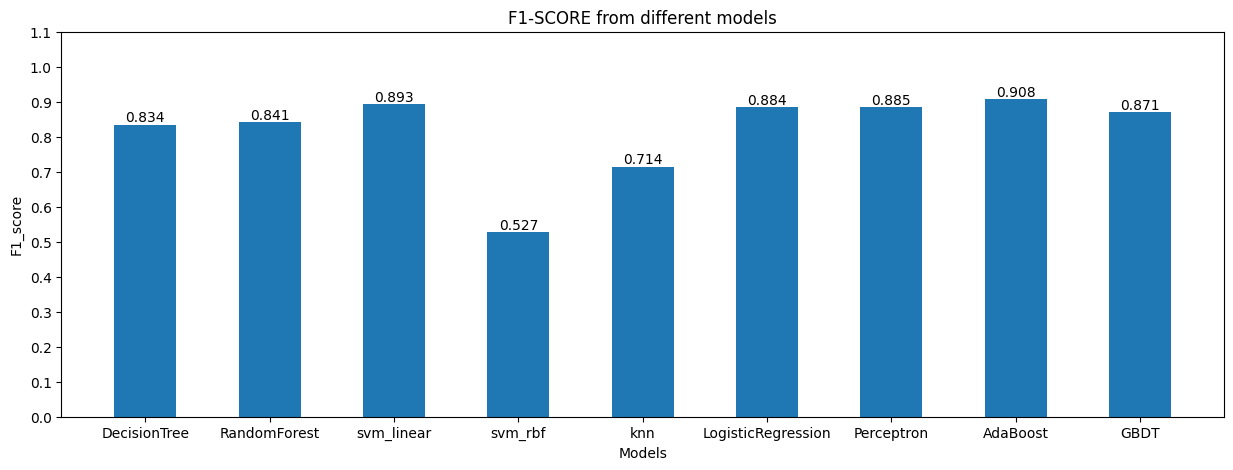

In [81]:
fig, ax = plt.subplots(1,1,figsize = (15,5))
ax.bar(f1_scores.keys(), f1_scores.values(), width=0.5)
ax.set_title(label='F1-SCORE from different models')
plt.yticks(np.arange(0,1.2,0.1))
plt.xlabel('Models')
plt.ylabel('F1_score')
for model,score in f1_scores.items():
    plt.text(model,score,'%.3f'%score,ha='center',va='bottom')
plt.show()